In [ ]:
# Installations
!pip install pandas
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Imports
import json
import glob
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Setup
Training df has 290k entries, 212k of which are in English. This is split up into a training set and validation set. The test set is a small set of 8k entries.

In [ ]:
# This is the train df, which will be broken up into a training set and a validation set
df = pd.read_csv("/content/drive/Shareddrives/CIS530 Final Project/datasets/train.csv")
# df = pd.read_csv("/content/drive/MyDrive/Copy of train.csv")

In [ ]:
test_df = pd.read_csv("/content/drive/Shareddrives/CIS530 Final Project/datasets/test.csv")
# test_df = pd.read_csv("/content/drive/MyDrive/Copy of test.csv")

In [ ]:
df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [ ]:
df_en = df.loc[df['Language'] == 'en']
df_trun = df_en.sample(frac=1).groupby('Genre').head(1200)
X = df_trun['Lyrics']
Y = df_trun['Genre']
trainX, valX, trainY, valY = train_test_split(X, Y, test_size=0.15)
testX = test_df['Lyrics']
testY = test_df['Genre']

In [ ]:
df_trun['Genre'].info

<bound method Series.info of 144108        Pop
184728        Pop
117444        Pop
269687      Metal
206357       Rock
           ...   
284356    Country
273232    Country
274539    Country
276617    Country
286728    Country
Name: Genre, Length: 12000, dtype: object>

In [ ]:
trainX

279967    Wake up Monday morning lookin' at another 50 h...
146887    I was a big man yesterday, but boy you ought t...
288138    (Bruce Springsteen) Last night I dreamed that ...
276737    I don't know what to think of it Sometimes I h...
181264    I'm sure someone would hear me if I scream.\nn...
                                ...                        
254487    Children of technocracy \nInvoke synthetic spi...
20263     Don't waste your time\nIt will never work\nDon...
193345    you better watch yourself sonny boy\neverybody...
284644    It seem to me that we don't always get along I...
232832    Feel the chills in the summer time, hopped and...
Name: Lyrics, Length: 10200, dtype: object

In [ ]:
trainY

279967    Country
146887        Pop
288138    Country
276737    Country
181264      Indie
           ...   
254487      Metal
20263       Metal
193345       Folk
284644       Jazz
232832      Indie
Name: Genre, Length: 10200, dtype: object

In [ ]:
valX

283857    Her turquoise lips kiss me like a lover. Her s...
275947    Declare independence Don't let them do that to...
189339    Open your eyes, and we confront the misery\nLi...
196433    I can love you in the morning\nI can love you ...
276469    {Chorus} Stretchy pants Stretchy pants Girl, I...
                                ...                        
270224    the sun is filled with ice\nand gives no warmt...
156716    California rain is falling\nI can hear the sum...
234211    Like everyone around he claimed to see and he ...
192289    I wish I was a flame dancing in a candle\nLigh...
245921    Whether you are here or yonder, \nWhether you ...
Name: Lyrics, Length: 1800, dtype: object

In [ ]:
valY

283857       Country
275947    Electronic
189339    Electronic
196433          Rock
276469    Electronic
             ...    
270224          Folk
156716          Jazz
234211          Rock
192289         Indie
245921          Jazz
Name: Genre, Length: 1800, dtype: object

In [ ]:
testX

0       Most folks spend their days daydreaming of fin...
1       Take your cold hands and put them on my face\n...
2       Are you ready it's time for war\nWe'll break d...
3       You ask me why I change the color of my hair\n...
4       Do you believe in magic in a young girl's hear...
                              ...                        
7930    Tuesday night - 7:30\nI hear a voice on the te...
7931    Elite forces cloaked in fur un sensitive to pa...
7932    [Dr. Dre]\nJourney with me\nInto the mind of a...
7933    You can a look a hurricane right in the eye.\n...
7934    Deal not the truth till you find the proof\nAn...
Name: Lyrics, Length: 7935, dtype: object

In [ ]:
testY

0       Hip-Hop
1         Indie
2         Metal
3           Pop
4       Hip-Hop
         ...   
7930       Rock
7931      Metal
7932    Hip-Hop
7933       Rock
7934       Rock
Name: Genre, Length: 7935, dtype: object

# Evaluation Script


In [ ]:
all_genres = set(df['Genre'])
all_genres

{'Country',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Metal',
 'Pop',
 'R&B',
 'Rock'}

In [ ]:
# Returns percent accuracy, (precision, recall, f1)
def evaluate(pred_labels, labels, genres):
    if len(pred_labels) != len(labels):
        return "Label sizes are no the same"
    tracker = {}
    total_corr = 0
    for x in genres:
        tracker[x] = {'count': 0, 'tp': 0, 'fp': 0, 'fn': 0}
    all_tp = 0
    all_fp = 0
    all_fn = 0
    for pred, actual in zip(pred_labels, labels):
        tracker[actual]['count'] = tracker[actual]['count'] + 1
        if pred == actual:
            tracker[pred]['tp'] = tracker[pred]['tp'] + 1
            all_tp += 1
            total_corr += 1
        else:
            tracker[actual]['fn'] = tracker[actual]['fn'] + 1
            tracker[pred]['fp'] = tracker[pred]['fp'] + 1
            all_fp += 1
            all_fn += 1

    all_stats = {}
    for genre in tracker.keys():
        tp = tracker[genre]['tp']
        fp = tracker[genre]['fp']
        fn = tracker[genre]['fn']
        precision = tp/(tp+fp) if (tp+fp) > 0 else 0
        recall = tp/(tp+fn) if (tp+fn) > 0 else 0
        f1 = precision*recall/(precision+recall) if (precision+recall) > 0 else 0
        all_stats[genre] = {'count': tracker[genre]['count'], 'precision': precision, 'recall': recall, 'f1_score': f1}
    total_precision = all_tp/(all_tp+all_fp) if (all_tp+all_fp) > 0 else 0
    total_recall = all_tp/(all_tp+all_fn) if (all_tp+all_fn) > 0 else 0
    weighted_precision = sum([tracker[genre]['count']*all_stats[genre]['precision'] for genre in tracker.keys()])/len(pred_labels)
    weighted_recall = sum([tracker[genre]['count']*all_stats[genre]['recall'] for genre in tracker.keys()])/len(pred_labels)
    weighted_f1 = sum([tracker[genre]['count']*all_stats[genre]['f1_score'] for genre in tracker.keys()])/len(pred_labels)
    total_stats = {
        'macro_precision': total_precision,
        'macro_recall': total_recall,
        'macro_f1_score': total_precision*total_recall/(total_precision+total_recall)
            if (total_precision+total_recall) > 0 else 0,
        'weighted_precision': weighted_precision,
        'weighted_recall': weighted_recall,
        'weighted_f1_score': weighted_f1
    }
    return total_corr/len(pred_labels), total_stats, all_stats

In [ ]:
from tabulate import tabulate

def format_evaluation(stats):
    headers = list(all_genres)
    data = []
    for genre in headers:
        data.append([genre] + list(stats[2][genre].values()))
    res = tabulate(data, headers=['Genre', 'Count', 'Precision', 'Recall', 'F1_score'])
    res += '\n\nOverall\n'
    res += 'Accuracy: ' + str(stats[0]) + '\n' + \
        'Weighted Precision: ' + str(stats[1]['weighted_precision']) + '\n' + \
        'Weighted Recall: ' + str(stats[1]['weighted_recall']) + '\n' + \
        'Weighted F1 Score: ' + str(stats[1]['weighted_f1_score']) + '\n' + \
        'Macro Precision: ' + str(stats[1]['macro_precision']) + '\n' + \
        'Macro Recall: ' + str(stats[1]['macro_recall']) + '\n' + \
        'Macro F1 Score: ' + str(stats[1]['macro_f1_score'])
    return res

# Simple Baseline
Majority class classifier. The simple baseline model will always output "Rock" because we encounter "Rock" 43% of the time in the training set.

In [ ]:
genre_popularity = df_en['Genre'].value_counts()
genre_popularity

Rock          107145
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: Genre, dtype: int64

In [ ]:
sorted_genres = genre_popularity.index.values.tolist()
sorted_genres

['Rock',
 'Pop',
 'Metal',
 'Jazz',
 'Folk',
 'Indie',
 'R&B',
 'Hip-Hop',
 'Electronic',
 'Country']

In [ ]:
genres_popularity_count = genre_popularity.to_list()
genres_popularity_count

[107145, 86298, 19133, 13314, 8169, 7240, 2765, 2238, 2005, 1890]

([<matplotlib.patches.Wedge at 0x7bc3bdab19c0>,
 [Text(0.51635005130364, 2.251551159649438, 'Rock'),
  Text(-1.8628167949274688, -1.366021079096569, 'Pop'),
  Text(0.8692085295014663, -2.140228149577026, 'Metal'),
  Text(1.6461083667965148, -1.6206255720438674, 'Jazz'),
  Text(2.0184632220222345, -1.1233459936028716, 'Folk'),
  Text(2.1967942881815303, -0.7142792559027641, 'Indie'),
  Text(2.268979167576007, -0.4333976662443989, 'R&B'),
  Text(2.291711695877655, -0.2900991261234101, 'Hip-Hop'),
  Text(2.3039083453470406, -0.16764944449733296, 'Electronic'),
  Text(2.3093495306353353, -0.054815557594152894, 'Country')],
 [Text(0.28164548252925814, 1.2281188143542388, '42.8%'),
  Text(-1.0160818881422555, -0.7451024067799465, '34.5%'),
  Text(0.47411374336443607, -1.1673971724965595, '7.6%'),
  Text(0.897877290979917, -0.8839775847512003, '5.3%'),
  Text(1.100979939284855, -0.6127341783288389, '3.3%'),
  Text(1.198251429917198, -0.38960686685605306, '2.9%'),
  Text(1.2376250004960037, -0

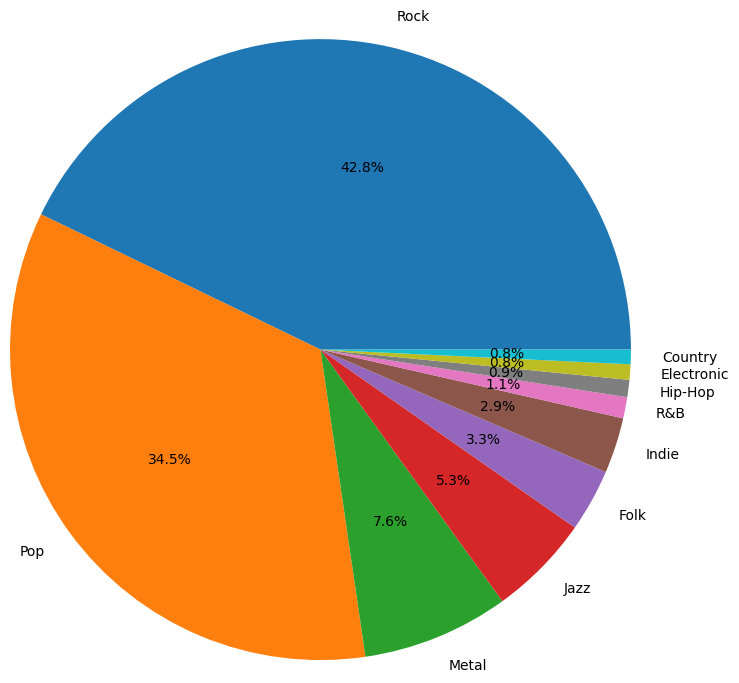

In [ ]:
fig, ax = plt.subplots()
ax.pie(genres_popularity_count, labels=sorted_genres, autopct='%1.1f%%', radius=2.1)

## Predicting the majority class

In [ ]:
# Find the majority class
majority_class = sorted_genres[0]
majority_class

'Rock'

In [ ]:
# Predict the majority class for all instances

def all_majority(input):
    y_pred = [majority_class] * len(input)
    return y_pred

In [ ]:
# Training accuracy
y_pred = all_majority(trainX)
evaluation = evaluate(y_pred, trainY, all_genres)
print(format_evaluation(evaluation))

Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Electronic     1023    0                 0   0
Jazz           1015    0                 0   0
Metal          1025    0                 0   0
Folk           1022    0                 0   0
Hip-Hop        1040    0                 0   0
Rock           1002    0.0982353         1   0.0894483
R&B            1018    0                 0   0
Indie          1016    0                 0   0
Country        1023    0                 0   0
Pop            1016    0                 0   0

Overall
Accuracy: 0.09823529411764706
Weighted Precision: 0.009650173010380623
Weighted Recall: 0.09823529411764706
Weighted F1 Score: 0.008786981316361575
Macro Precision: 0.09823529411764706
Macro Recall: 0.09823529411764706
Macro F1 Score: 0.04911764705882353


In [ ]:
# Validation accuracy
y_pred = all_majority(valX)
evaluation = evaluate(y_pred, valY, all_genres)
print(format_evaluation(evaluation))

Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Electronic      177         0            0   0
Jazz            185         0            0   0
Metal           175         0            0   0
Folk            178         0            0   0
Hip-Hop         160         0            0   0
Rock            198         0.11         1   0.0990991
R&B             182         0            0   0
Indie           184         0            0   0
Country         177         0            0   0
Pop             184         0            0   0

Overall
Accuracy: 0.11
Weighted Precision: 0.012100000000000001
Weighted Recall: 0.11
Weighted F1 Score: 0.010900900900900899
Macro Precision: 0.11
Macro Recall: 0.11
Macro F1 Score: 0.055


In [ ]:
# Test accuracy
y_pred = all_majority(testX)
evaluation = evaluate(y_pred, testY, all_genres)
print(format_evaluation(evaluation))

Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Electronic      660     0                0    0
Jazz            660     0                0    0
Metal           810     0                0    0
Folk            495     0                0    0
Hip-Hop         960     0                0    0
Rock           1410     0.177694         1    0.150883
R&B             510     0                0    0
Indie           510     0                0    0
Country         810     0                0    0
Pop            1110     0                0    0

Overall
Accuracy: 0.1776937618147448
Weighted Precision: 0.031575072987875256
Weighted Recall: 0.1776937618147448
Weighted F1 Score: 0.026810936774616392
Macro Precision: 0.1776937618147448
Macro Recall: 0.1776937618147448
Macro F1 Score: 0.08884688090737239


# Transformer-based Models (with Sentiment Analysis)


In [ ]:
!pip install transformers
!pip install torch
!pip install tqdm
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
import torch
print(torch.__version__)

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from transformers import AdamW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, normalize
import torch.nn as nn

# using distiled bert
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

2.1.0+cu121


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def emotion_analysis(lyric):
    analyzer = SentimentIntensityAnalyzer()
    emotion_scores = []

    for text in lyric:
        sentiment = analyzer.polarity_scores(text)
        emotion_scores.append(sentiment['compound'])

    return emotion_scores

### distillBERT

In [ ]:
# pre-trained BERT (vanilla)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 10
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)
# tfidf_vectorizer = TfidfVectorizer()

train_emotion_scores = emotion_analysis(trainX)
val_emotion_scores = emotion_analysis(valX)

train_emotions = torch.tensor(train_emotion_scores, dtype=torch.float32).unsqueeze(1)
val_emotions = torch.tensor(val_emotion_scores, dtype=torch.float32).unsqueeze(1)

# convert genres to numerical labels
genre_to_id = {genre: i for i, genre in enumerate(sorted(all_genres))}
id_to_genre = {i: genre for genre, i in genre_to_id.items()}
train_labels = torch.tensor([genre_to_id[genre] for genre in trainY])
val_labels = torch.tensor([genre_to_id[genre] for genre in valY])

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def batch_tokenize(tokenizer, texts, tfidf_features, labels, batch_size=100):
    """ Tokenize texts in smaller batches """
    tokenized_batches = {
        'input_ids': [],
        'attention_mask': [],
        #'tfidf_features': [],
        'emotion' : [],
        'labels': []
    }
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        #batch_tfidf = tfidf_features[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]
        batch_emotion = labels[i:i + batch_size]

        # Tokenize text
        tokenized = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

        # Convert TF-IDF features to tensors
        #batch_tfidf = torch.tensor(batch_tfidf, dtype=torch.float32)

        batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)

        # Append to tokenized_batches
        tokenized_batches['input_ids'].append(tokenized['input_ids'])
        tokenized_batches['attention_mask'].append(tokenized['attention_mask'])
        #tokenized_batches['tfidf_features'].append(batch_tfidf)
        tokenized_batches['emotion'].append(batch_emotion)
        tokenized_batches['labels'].append(batch_labels)

    # concatenate
    tokenized_batches['input_ids'] = torch.cat(tokenized_batches['input_ids'], dim=0)
    tokenized_batches['attention_mask'] = torch.cat(tokenized_batches['attention_mask'], dim=0)
    #tokenized_batches['tfidf_features'] = torch.cat(tokenized_batches['tfidf_features'], dim=0)
    tokenized_batches['emotion'] = torch.cat(tokenized_batches['emotion'], dim=0)
    tokenized_batches['labels'] = torch.cat(tokenized_batches['labels'], dim=0)

    return tokenized_batches

In [ ]:
# tokenizing train data
train_data_tokens = batch_tokenize(
    tokenizer,
    trainX.tolist(),
    #train_tfidf_features,
    train_emotions,
    train_labels,
    batch_size=100
)

# tokenize validation data
val_data_tokens = batch_tokenize(
    tokenizer,
    valX.tolist(),
    #val_tfidf_features,
    val_emotions,
    val_labels,
    batch_size=100
)


# dataloaders
batch_size = 4
train_data = TensorDataset(train_data_tokens['input_ids'], train_data_tokens['attention_mask'], train_emotions, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data = TensorDataset(val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_emotions, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

<ipython-input-32-3bea2ee3b2c8>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)


In [ ]:
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# saving checkpoints
import os

def save_checkpoint(model, optimizer, epoch, batch, file_path):
    checkpoint = {
        'epoch': epoch,
        'batch': batch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, file_path)

# loading checkpoints
def load_checkpoint(model, optimizer, file_path="checkpoint.pth"):
    if os.path.isfile(file_path):
        print(f"Loading checkpoint '{file_path}'")
        checkpoint = torch.load(file_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        batch = checkpoint.get('batch', 0)
        return epoch,batch
    else:
        print(f"No checkpoint found at '{file_path}'")
        return 0,0

# Load checkpoint if available
start_epoch, start_batch = load_checkpoint(model, optimizer, file_path="checkpoint.pth")

No checkpoint found at 'checkpoint.pth'


In [ ]:
# Ensure the model is on the right device
model.to(device)

# training loop
model.train()
print("start training..")

checkpoint_interval = 5000

for epoch in range(start_epoch, 3):  # Number of epochs
    total_loss = 0
    print(f"Epoch {epoch + 1}/{3}")
    for step, batch in enumerate(tqdm(train_dataloader)):
        b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

        model.zero_grad()

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        combined_features = torch.cat((logits, b_emotion), dim=1)

        loss = criterion(combined_features, b_labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Print loss every 5000 batches
        if (step % 5000) == 0 and not step == 0:
            print(f"Batch {step} of {len(train_dataloader)}. Loss: {loss.item()}")

        # Save checkpoint periodically
        if (step % checkpoint_interval) == 0:
            checkpoint_path = f"checkpoint_epoch_{epoch}_batch_{step}.pth"
            save_checkpoint(model, optimizer, epoch, step, file_path=checkpoint_path)

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")

    # quick eval at the end of each epoch
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        for batch in val_dataloader:
            b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits

            combined_features = torch.cat((logits, b_emotion), dim=1)

            predictions = torch.argmax(combined_features, dim=1)
            correct += (predictions == b_labels).sum().item()
            total += b_labels.size(0)

        print(f"Validation Accuracy after epoch {epoch + 1}: {correct / total:.4f}")

    # save checkpoint at the end of each epoch
    save_checkpoint(model, optimizer, epoch, step, file_path=f"checkpoint_epoch_{epoch}.pth")
    # reset to train
    model.train()

print("Training complete.")


start training..
Epoch 1/3


100%|██████████| 2550/2550 [08:31<00:00,  4.98it/s]


Average training loss: 1.9069740024267459
Validation Accuracy after epoch 1: 0.3878
Epoch 2/3


100%|██████████| 2550/2550 [08:38<00:00,  4.91it/s]


Average training loss: 1.5568670675918168
Validation Accuracy after epoch 2: 0.3978
Epoch 3/3


100%|██████████| 2550/2550 [08:42<00:00,  4.88it/s]


Average training loss: 1.2339850455990025
Validation Accuracy after epoch 3: 0.3989
Training complete.


In [ ]:
# evaluation
model.eval()
val_predictions = []
val_true_labels = []
for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_emotions, b_labels = batch

    with torch.no_grad() :
        outputs = model(b_input_ids, attention_mask=b_input_mask)

    logits = outputs.logits

    concatenated_features = torch.cat([logits, b_emotions], dim=1)

    predictions = torch.argmax(concatenated_features, dim=1)
    val_predictions.extend(predictions.cpu().numpy())
    val_true_labels.extend(b_labels.cpu().numpy())

val_acc = accuracy_score(val_true_labels, val_predictions)
print(f"Validation Accuracy: {val_acc}")
val_pred_genres = [id_to_genre[label] for label in val_predictions]
val_true_genres = [id_to_genre[label] for label in val_true_labels]

evaluation = evaluate(val_pred_genres, val_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))

Validation Accuracy: 0.3988888888888889
Genre         Count    Precision     Recall    F1_score
----------  -------  -----------  ---------  ----------
Electronic      177     0.253275  0.327684    0.142857
Jazz            185     0.625698  0.605405    0.307692
Metal           175     0.657534  0.274286    0.193548
Folk            178     0.350993  0.297753    0.161094
Hip-Hop         160     0.658683  0.6875      0.336391
Rock            198     0.230769  0.0757576   0.0570342
R&B             182     0.396226  0.461538    0.213198
Indie           184     0.323404  0.413043    0.181384
Country         177     0.390323  0.683616    0.24846
Pop             184     0.22905   0.222826    0.112948

Overall
Accuracy: 0.3988888888888889
Weighted Precision: 0.4067014814199695
Weighted Recall: 0.3988888888888889
Weighted F1 Score: 0.19267025034807103
Macro Precision: 0.3988888888888889
Macro Recall: 0.3988888888888889
Macro F1 Score: 0.19944444444444445


In [ ]:
# Test
# test_tfidf_features = tfidf_vectorizer.transform(testX).toarray()

# # normalize features
# test_tfidf_features = scaler.transform(test_tfidf_features)
# test_tfidf_features = normalize(test_tfidf_features, norm='l2')

# test_tfidf_features = torch.tensor(test_tfidf_features, dtype=torch.float32)

test_emotion_scores = emotion_analysis(testX)
test_emotions = torch.tensor(test_emotion_scores, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor([genre_to_id[genre] for genre in testY])

# Test
# add test dataloader
test_data_tokens = tokenizer(
    testX.tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

test_data = TensorDataset(test_data_tokens['input_ids'],
                          test_data_tokens['attention_mask'],
                          test_emotions,
                          test_labels)

test_batch_size = 16
test_dataloader = DataLoader(test_data, batch_size=test_batch_size)

# Evaluation on test set
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_emotions, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        logits = outputs.logits
        concatenated_features = torch.cat([logits, b_emotions], dim=1)

        predictions = torch.argmax(concatenated_features, dim=1)
        test_predictions.extend(predictions.cpu().numpy())
        test_true_labels.extend(b_labels.cpu().numpy())

test_acc = accuracy_score(test_true_labels, test_predictions)
print(f"Test Accuracy: {test_acc}")

test_pred_genres = [id_to_genre[label] for label in test_predictions]
test_true_genres = [id_to_genre[label] for label in test_true_labels]
evaluation = evaluate(test_pred_genres, test_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))

Test Accuracy: 0.37265280403276624
Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Electronic      660     0.214286  0.359091   0.134202
Jazz            660     0.471591  0.377273   0.209596
Metal           810     0.72009   0.393827   0.254589
Folk            495     0.259012  0.391919   0.155949
Hip-Hop         960     0.868812  0.73125    0.397059
Rock           1410     0.376147  0.087234   0.0708117
R&B             510     0.19645   0.32549    0.122509
Indie           510     0.176238  0.34902    0.117105
Country         810     0.415535  0.680247   0.257959
Pop            1110     0.300126  0.214414   0.125066

Overall
Accuracy: 0.37265280403276624
Weighted Precision: 0.42701742380492974
Weighted Recall: 0.37265280403276624
Weighted F1 Score: 0.18416029642419923
Macro Precision: 0.37265280403276624
Macro Recall: 0.37265280403276624
Macro F1 Score: 0.18632640201638315


In [ ]:
# creating and exporting a csv of the predictions and true labels for error analysis

val_predictions.extend(predictions.cpu().numpy())

val_true_labels.extend(b_labels.cpu().numpy())

test_predictions.extend(predictions.cpu().numpy())

test_true_labels.extend(b_labels.cpu().numpy())

# Create a DataFrame for validation set
val_df = pd.DataFrame({
    'Lyrics': valX,  # assuming valX contains the lyrics
    'True Labels': val_true_genres,  # Convert numerical labels to genre names
    'Predicted Labels': val_pred_genres  # Convert numerical labels to genre names
})

# Save to CSV
val_df.to_csv('validation_predictions.csv', index=False)

# Similarly for the test set
test_df = pd.DataFrame({
    'Lyrics': testX,  # assuming testX contains the lyrics
    'True Labels': test_true_genres,  # Convert numerical labels to genre names
    'Predicted Labels': test_pred_genres  # Convert numerical labels to genre names
})

# Save to CSV
test_df.to_csv('test_predictions.csv', index=False)

In [ ]:
from google.colab import files
files.download('validation_predictions.csv')
files.download('test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## BERT

In [ ]:
# pre-trained BERT (vanilla)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(trainY)))

train_emotion_scores = emotion_analysis(trainX)
val_emotion_scores = emotion_analysis(valX)

train_emotions = torch.tensor(train_emotion_scores, dtype=torch.float32).unsqueeze(1)
val_emotions = torch.tensor(val_emotion_scores, dtype=torch.float32).unsqueeze(1)

# Convert genres to numerical labels
genre_to_id = {genre: i for i, genre in enumerate(sorted(all_genres))}
id_to_genre = {i: genre for genre, i in genre_to_id.items()}
train_labels = torch.tensor([genre_to_id[genre] for genre in trainY])
val_labels = torch.tensor([genre_to_id[genre] for genre in valY])

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def batch_tokenize(tokenizer, texts, tfidf_features, labels, batch_size=100):
    """ Tokenize texts in smaller batches """
    tokenized_batches = {
        'input_ids': [],
        'attention_mask': [],
        #'tfidf_features': [],
        'emotion' : [],
        'labels': []
    }
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        #batch_tfidf = tfidf_features[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]
        batch_emotion = labels[i:i + batch_size]

        # Tokenize text
        tokenized = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

        # Convert TF-IDF features to tensors
        #batch_tfidf = torch.tensor(batch_tfidf, dtype=torch.float32)

        batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)

        # Append to tokenized_batches
        tokenized_batches['input_ids'].append(tokenized['input_ids'])
        tokenized_batches['attention_mask'].append(tokenized['attention_mask'])
        #tokenized_batches['tfidf_features'].append(batch_tfidf)
        tokenized_batches['emotion'].append(batch_emotion)
        tokenized_batches['labels'].append(batch_labels)

    # concatenate
    tokenized_batches['input_ids'] = torch.cat(tokenized_batches['input_ids'], dim=0)
    tokenized_batches['attention_mask'] = torch.cat(tokenized_batches['attention_mask'], dim=0)
    #tokenized_batches['tfidf_features'] = torch.cat(tokenized_batches['tfidf_features'], dim=0)
    tokenized_batches['emotion'] = torch.cat(tokenized_batches['emotion'], dim=0)
    tokenized_batches['labels'] = torch.cat(tokenized_batches['labels'], dim=0)

    return tokenized_batches

In [ ]:
# tokenizing train data
train_data_tokens = batch_tokenize(
    tokenizer,
    trainX.tolist(),
    #train_tfidf_features,
    train_emotions,
    train_labels,
    batch_size=100
)

# tokenize validation data
val_data_tokens = batch_tokenize(
    tokenizer,
    valX.tolist(),
    #val_tfidf_features,
    val_emotions,
    val_labels,
    batch_size=100
)


# dataloaders
batch_size = 4
train_data = TensorDataset(train_data_tokens['input_ids'], train_data_tokens['attention_mask'], train_emotions, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data = TensorDataset(val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_emotions, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

<ipython-input-39-3bea2ee3b2c8>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)


In [ ]:
# optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# loss function
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# saving checkpoints
import os

def save_checkpoint(model, optimizer, epoch, batch, file_path):
    checkpoint = {
        'epoch': epoch,
        'batch': batch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, file_path)

# loading checkpoints
def load_checkpoint(model, optimizer, file_path="checkpoint.pth"):
    if os.path.isfile(file_path):
        print(f"Loading checkpoint '{file_path}'")
        checkpoint = torch.load(file_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        batch = checkpoint.get('batch', 0)
        return epoch,batch
    else:
        print(f"No checkpoint found at '{file_path}'")
        return 0,0

# Load checkpoint if available
start_epoch, start_batch = load_checkpoint(model, optimizer, file_path="checkpoint.pth")

No checkpoint found at 'checkpoint.pth'


In [ ]:
# Ensure the model is on the right device
model.to(device)

# training loop
model.train()
print("start training..")

checkpoint_interval = 5000

for epoch in range(start_epoch, 3):  # Number of epochs
    total_loss = 0
    print(f"Epoch {epoch + 1}/{3}")
    for step, batch in enumerate(tqdm(train_dataloader)):
        b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

        model.zero_grad()

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        combined_features = torch.cat((logits, b_emotion), dim=1)

        loss = criterion(combined_features, b_labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Print loss every 5000 batches
        if (step % 5000) == 0 and not step == 0:
            print(f"Batch {step} of {len(train_dataloader)}. Loss: {loss.item()}")

        # Save checkpoint periodically
        if (step % checkpoint_interval) == 0:
            checkpoint_path = f"checkpoint_epoch_{epoch}_batch_{step}.pth"
            save_checkpoint(model, optimizer, epoch, step, file_path=checkpoint_path)

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")

    # quick eval at the end of each epoch
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        for batch in val_dataloader:
            b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits

            combined_features = torch.cat((logits, b_emotion), dim=1)

            predictions = torch.argmax(combined_features, dim=1)
            correct += (predictions == b_labels).sum().item()
            total += b_labels.size(0)

        print(f"Validation Accuracy after epoch {epoch + 1}: {correct / total:.4f}")

    # save checkpoint at the end of each epoch
    save_checkpoint(model, optimizer, epoch, step, file_path=f"checkpoint_epoch_{epoch}.pth")
    # reset to train
    model.train()

print("Training complete.")


start training..
Epoch 1/3


100%|██████████| 2550/2550 [18:31<00:00,  2.29it/s]


Average training loss: 1.9007641415385639
Validation Accuracy after epoch 1: 0.3933
Epoch 2/3


100%|██████████| 2550/2550 [18:46<00:00,  2.26it/s]


Average training loss: 1.489156020797935
Validation Accuracy after epoch 2: 0.4333
Epoch 3/3


100%|██████████| 2550/2550 [18:29<00:00,  2.30it/s]


Average training loss: 1.0816187153552093
Validation Accuracy after epoch 3: 0.4350
Training complete.


In [ ]:
# evaluation
model.eval()
val_predictions = []
val_true_labels = []
for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_emotions, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)

    logits = outputs.logits

    concatenated_features = torch.cat([logits, b_emotions], dim=1)

    predictions = torch.argmax(concatenated_features, dim=1)
    val_predictions.extend(predictions.cpu().numpy())
    val_true_labels.extend(b_labels.cpu().numpy())

val_acc = accuracy_score(val_true_labels, val_predictions)
print(f"Validation Accuracy: {val_acc}")
val_pred_genres = [id_to_genre[label] for label in val_predictions]
val_true_genres = [id_to_genre[label] for label in val_true_labels]

evaluation = evaluate(val_pred_genres, val_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))

Validation Accuracy: 0.435
Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Folk            174     0.333333  0.304598    0.159159
Hip-Hop         176     0.754601  0.698864    0.362832
Indie           193     0.29386   0.34715     0.159145
Pop             177     0.325153  0.299435    0.155882
Electronic      192     0.433333  0.270833    0.166667
Metal           173     0.539474  0.710983    0.306733
R&B             172     0.341667  0.238372    0.140411
Country         184     0.421927  0.690217    0.261856
Jazz            188     0.724138  0.558511    0.315315
Rock            171     0.225434  0.22807     0.113372

Overall
Accuracy: 0.435
Weighted Precision: 0.44038561387969427
Weighted Recall: 0.435
Weighted F1 Score: 0.21440061940913507
Macro Precision: 0.435
Macro Recall: 0.435
Macro F1 Score: 0.2175


In [ ]:
# Test
# test_tfidf_features = tfidf_vectorizer.transform(testX).toarray()

# # normalize features
# test_tfidf_features = scaler.transform(test_tfidf_features)
# test_tfidf_features = normalize(test_tfidf_features, norm='l2')

# test_tfidf_features = torch.tensor(test_tfidf_features, dtype=torch.float32)

test_emotion_scores = emotion_analysis(testX)
test_emotions = torch.tensor(test_emotion_scores, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor([genre_to_id[genre] for genre in testY])

# Test
# add test dataloader
test_data_tokens = tokenizer(
    testX.tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

test_data = TensorDataset(test_data_tokens['input_ids'],
                          test_data_tokens['attention_mask'],
                          test_emotions,
                          test_labels)

test_batch_size = 16
test_dataloader = DataLoader(test_data, batch_size=test_batch_size)

# Evaluation on test set
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_emotions, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        logits = outputs.logits
        concatenated_features = torch.cat([logits, b_emotions], dim=1)

        predictions = torch.argmax(concatenated_features, dim=1)
        test_predictions.extend(predictions.cpu().numpy())
        test_true_labels.extend(b_labels.cpu().numpy())

test_acc = accuracy_score(test_true_labels, test_predictions)
print(f"Test Accuracy: {test_acc}")

test_pred_genres = [id_to_genre[label] for label in test_predictions]
test_true_genres = [id_to_genre[label] for label in test_true_labels]
evaluation = evaluate(test_pred_genres, test_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))

Test Accuracy: 0.394580970384373
Genre         Count    Precision    Recall    F1_score
----------  -------  -----------  --------  ----------
Folk            495     0.255659  0.387879    0.154093
Hip-Hop         960     0.891304  0.640625    0.372727
Indie           510     0.209052  0.380392    0.13491
Pop            1110     0.313324  0.192793    0.119353
Electronic      660     0.286713  0.248485    0.133117
Metal           810     0.488556  0.685185    0.2852
R&B             510     0.258117  0.311765    0.141208
Country         810     0.421838  0.662963    0.257801
Jazz            660     0.486486  0.381818    0.213922
Rock           1410     0.324219  0.176596    0.114325

Overall
Accuracy: 0.394580970384373
Weighted Precision: 0.412492556957315
Weighted Recall: 0.394580970384373
Weighted F1 Score: 0.19375819890777238
Macro Precision: 0.394580970384373
Macro Recall: 0.394580970384373
Macro F1 Score: 0.1972904851921865


## RoBERTa

For milestone 3, we added tf-idf as a feature and accoridngly updated the preprocessing steps, batch_tokenize function, tokenization parameters and training and test loop. To run this code, just run the two cells below Strong Baseline downloading the necessary imports and then run all cells underneath this markdown cell.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(set(trainY)))
# tfidf_vectorizer = TfidfVectorizer()

train_emotion_scores = emotion_analysis(trainX)
val_emotion_scores = emotion_analysis(valX)

train_emotions = torch.tensor(train_emotion_scores, dtype=torch.float32).unsqueeze(1)
val_emotions = torch.tensor(val_emotion_scores, dtype=torch.float32).unsqueeze(1)

# convert genres to numerical labels
genre_to_id = {genre: i for i, genre in enumerate(sorted(all_genres))}
id_to_genre = {i: genre for genre, i in genre_to_id.items()}
train_labels = torch.tensor([genre_to_id[genre] for genre in trainY])
val_labels = torch.tensor([genre_to_id[genre] for genre in valY])

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def batch_tokenize(tokenizer, texts, tfidf_features, labels, batch_size=100):
    """ Tokenize texts in smaller batches """
    tokenized_batches = {
        'input_ids': [],
        'attention_mask': [],
        #'tfidf_features': [],
        'emotion' : [],
        'labels': []
    }
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        #batch_tfidf = tfidf_features[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]
        batch_emotion = labels[i:i + batch_size]

        # Tokenize text
        tokenized = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

        # Convert TF-IDF features to tensors
        #batch_tfidf = torch.tensor(batch_tfidf, dtype=torch.float32)

        batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)

        # Append to tokenized_batches
        tokenized_batches['input_ids'].append(tokenized['input_ids'])
        tokenized_batches['attention_mask'].append(tokenized['attention_mask'])
        #tokenized_batches['tfidf_features'].append(batch_tfidf)
        tokenized_batches['emotion'].append(batch_emotion)
        tokenized_batches['labels'].append(batch_labels)

    # concatenate
    tokenized_batches['input_ids'] = torch.cat(tokenized_batches['input_ids'], dim=0)
    tokenized_batches['attention_mask'] = torch.cat(tokenized_batches['attention_mask'], dim=0)
    #tokenized_batches['tfidf_features'] = torch.cat(tokenized_batches['tfidf_features'], dim=0)
    tokenized_batches['emotion'] = torch.cat(tokenized_batches['emotion'], dim=0)
    tokenized_batches['labels'] = torch.cat(tokenized_batches['labels'], dim=0)

    return tokenized_batches

In [ ]:
# tokenizing train data
train_data_tokens = batch_tokenize(
    tokenizer,
    trainX.tolist(),
    #train_tfidf_features,
    train_emotions,
    train_labels,
    batch_size=100
)

# tokenize validation data
val_data_tokens = batch_tokenize(
    tokenizer,
    valX.tolist(),
    #val_tfidf_features,
    val_emotions,
    val_labels,
    batch_size=100
)


# dataloaders
batch_size = 4
train_data = TensorDataset(train_data_tokens['input_ids'], train_data_tokens['attention_mask'], train_emotions, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data = TensorDataset(val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_emotions, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

<ipython-input-21-3bea2ee3b2c8>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_emotion = torch.tensor(batch_emotion, dtype=torch.float32)


In [ ]:
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# saving checkpoints
import os

def save_checkpoint(model, optimizer, epoch, batch, file_path):
    checkpoint = {
        'epoch': epoch,
        'batch': batch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint, file_path)

# loading checkpoints
def load_checkpoint(model, optimizer, file_path="checkpoint.pth"):
    if os.path.isfile(file_path):
        print(f"Loading checkpoint '{file_path}'")
        checkpoint = torch.load(file_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        batch = checkpoint.get('batch', 0)
        return epoch,batch
    else:
        print(f"No checkpoint found at '{file_path}'")
        return 0,0

# Load checkpoint if available
start_epoch, start_batch = load_checkpoint(model, optimizer, file_path="checkpoint.pth")

No checkpoint found at 'checkpoint.pth'


In [ ]:
# Ensure the model is on the right device
model.to(device)

# training loop
model.train()
print("start training..")

checkpoint_interval = 5000

for epoch in range(start_epoch, 3):  # Number of epochs
    total_loss = 0
    print(f"Epoch {epoch + 1}/{3}")
    for step, batch in enumerate(tqdm(train_dataloader)):
        b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

        model.zero_grad()

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        combined_features = torch.cat((logits, b_emotion), dim=1)

        loss = criterion(combined_features, b_labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Print loss every 5000 batches
        if (step % 5000) == 0 and not step == 0:
            print(f"Batch {step} of {len(train_dataloader)}. Loss: {loss.item()}")

        # Save checkpoint periodically
        if (step % checkpoint_interval) == 0:
            checkpoint_path = f"checkpoint_epoch_{epoch}_batch_{step}.pth"
            save_checkpoint(model, optimizer, epoch, step, file_path=checkpoint_path)

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")

    # quick eval at the end of each epoch
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        for batch in val_dataloader:
            b_input_ids, b_input_mask, b_emotion, b_labels = tuple(t.to(device) for t in batch)

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits

            combined_features = torch.cat((logits, b_emotion), dim=1)

            predictions = torch.argmax(combined_features, dim=1)
            correct += (predictions == b_labels).sum().item()
            total += b_labels.size(0)

        print(f"Validation Accuracy after epoch {epoch + 1}: {correct / total:.4f}")

    # save checkpoint at the end of each epoch
    save_checkpoint(model, optimizer, epoch, step, file_path=f"checkpoint_epoch_{epoch}.pth")
    # reset to train
    model.train()

print("Training complete.")


start training..
Epoch 1/3


100%|██████████| 2550/2550 [17:09<00:00,  2.48it/s]


Average training loss: 1.634465026837938
Validation Accuracy after epoch 1: 0.5139
Epoch 2/3


100%|██████████| 2550/2550 [17:15<00:00,  2.46it/s]


Average training loss: 1.2822915410440343
Validation Accuracy after epoch 2: 0.5300
Epoch 3/3


 16%|█▌        | 412/2550 [02:55<14:16,  2.50it/s]

In [ ]:
# evaluation
model.eval()
val_predictions = []
val_true_labels = []
for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_emotions, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)

    logits = outputs.logits

    concatenated_features = torch.cat([logits, b_emotions], dim=1)

    predictions = torch.argmax(concatenated_features, dim=1)
    val_predictions.extend(predictions.cpu().numpy())
    val_true_labels.extend(b_labels.cpu().numpy())

val_acc = accuracy_score(val_true_labels, val_predictions)
print(f"Validation Accuracy: {val_acc}")
val_pred_genres = [id_to_genre[label] for label in val_predictions]
val_true_genres = [id_to_genre[label] for label in val_true_labels]

evaluation = evaluate(val_pred_genres, val_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))

In [ ]:
# Test

test_emotion_scores = emotion_analysis(testX)
test_emotions = torch.tensor(test_emotion_scores, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor([genre_to_id[genre] for genre in testY])

# Test
# add test dataloader
test_data_tokens = tokenizer(
    testX.tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

test_data = TensorDataset(test_data_tokens['input_ids'],
                          test_data_tokens['attention_mask'],
                          test_emotions,
                          test_labels)

test_batch_size = 16
test_dataloader = DataLoader(test_data, batch_size=test_batch_size)

# Evaluation on test set
model.eval()  # Set the model to evaluation mode
test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_emotions, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        logits = outputs.logits
        concatenated_features = torch.cat([logits, b_emotions], dim=1)

        predictions = torch.argmax(concatenated_features, dim=1)
        test_predictions.extend(predictions.cpu().numpy())
        test_true_labels.extend(b_labels.cpu().numpy())

test_acc = accuracy_score(test_true_labels, test_predictions)
print(f"Test Accuracy: {test_acc}")

test_pred_genres = [id_to_genre[label] for label in test_predictions]
test_true_genres = [id_to_genre[label] for label in test_true_labels]
evaluation = evaluate(test_pred_genres, test_true_genres, sorted(all_genres))
print(format_evaluation(evaluation))